In [45]:
import gymnasium as gym
import numpy as np
from tqdm import tqdm
import sys
sys.path.append("..")
import os
# avoid TF messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# set up plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
from IPython.display import clear_output
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
mpl.rcParams['animation.embed_limit'] = 2**128

In [46]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [47]:
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='rgb_array')
env.reset()

((15, 10, 0), {})

# Random Agent

In [49]:
from src.agents import RandomAgent

random_agent = RandomAgent(env=env)

In [50]:
eval_rewards = random_agent.evaluate(n_episodes=1000)

100%|██████████| 1000/1000 [00:00<00:00, 13695.51it/s]


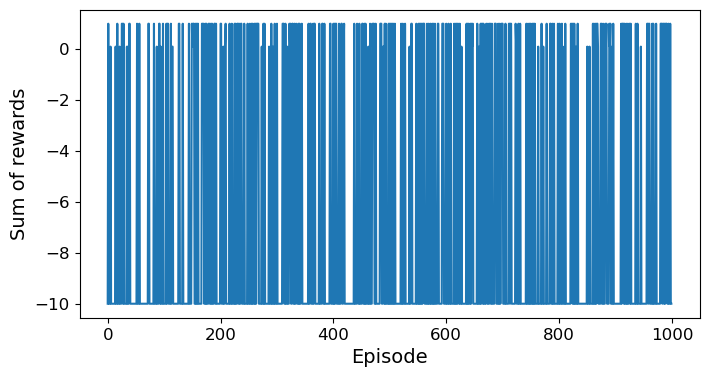

In [51]:
random_agent.plot_performance(rewards=eval_rewards)

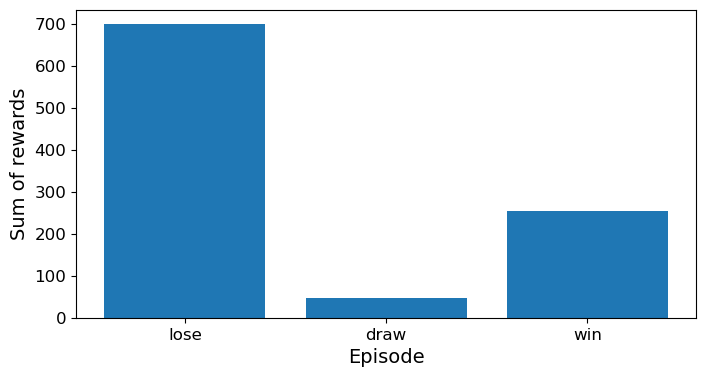

In [52]:
random_agent.plot_wins(rewards=eval_rewards)

# DQN

In [53]:
keras.backend.clear_session()
input_shape = [3] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(128, activation="elu", input_shape=input_shape),
    keras.layers.Dense(64, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

In [54]:
from importlib import reload
import src.agents
reload(src.agents)
from src.agents import DQNAgent

env.reset()
dqn_agent = DQNAgent(env=env,
                     num_states=3,
                     num_actions=2,
                     batch_size=200,
                     gamma=0.8)

In [55]:
train_rewards = dqn_agent.train(n_episodes=2000)

100%|██████████| 2000/2000 [03:50<00:00,  8.67it/s]


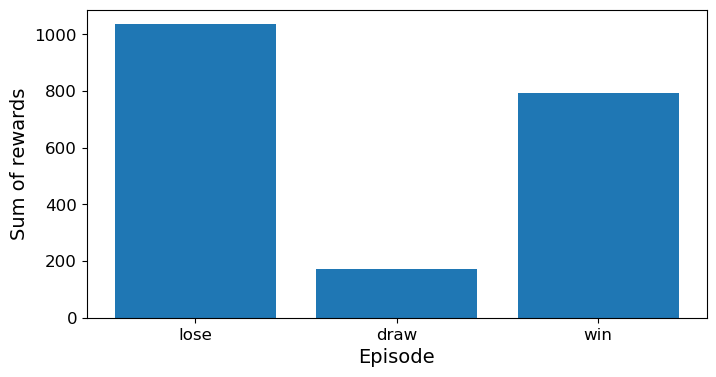

In [56]:
dqn_agent.plot_wins(rewards=train_rewards)

In [57]:
eval_rewards = dqn_agent.evaluate(n_episodes=1000)

100%|██████████| 1000/1000 [01:09<00:00, 14.43it/s]


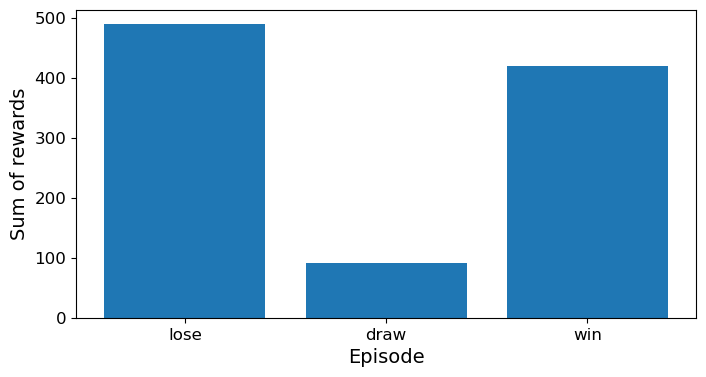

In [58]:
dqn_agent.plot_wins(rewards=eval_rewards)